## バスケット分析（アソシエーション分析）とは？

ある事象と"同時に発生する事象"が何かを分析する手法。

ex.)消費者が「ある商品」を購入した際に、よく一緒に買われている商品は何か？


## よく使用される指標

### ・Confidence（信頼度）
「リンゴを買った人のうち、どれくらいの人がミカンも買ったか」という確率

### ・Support（支持度）
「そもそもリンゴとミカンを一緒に買った人がどのくらいいるのか」という指標

### ・Lift（リフト）
「そもそもミカン自体がどれだけ売れているのか」という指標


## Aprioriアルゴリズム
実際は1対1だけでなく、「リンゴとミカンを買った人がモモをどれだけ買うか」、のような多対多の関係性もある。

・・・が、商品数が多くなってくるとそこまですべて計算するのはほぼ無理なので、この計算を高速で行うためのアルゴリズム。


In [1]:
#データの読み込み＆整形
import pandas as pd

df_sales = pd.read_csv("9-8_baslet.csv",index_col="名前")
df_sales = df_sales.fillna(False).replace("○",True)

In [2]:
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

#aprioriでまずsupportが高い単品or組み合わせを選出
freq_items = apriori(df_sales, min_support=0.1, use_colnames=True)

#上で選ばれた組み合わせの中でliftが高い組み合わせを選出
freq_items_top = association_rules(freq_items, metric = "lift",min_threshold = 1.5)

freq_items_top

antecedents consequents  antecedent support  consequent support   support  \
0        (バナナ)       (みかん)            0.307692            0.384615  0.192308   
1        (みかん)       (バナナ)            0.384615            0.307692  0.192308   
2        (バナナ)       (すいか)            0.307692            0.307692  0.153846   
3        (すいか)       (バナナ)            0.307692            0.307692  0.153846   
4    (もも, りんご)       (みかん)            0.192308            0.384615  0.115385   
5   (りんご, みかん)        (もも)            0.192308            0.346154  0.115385   
6         (もも)  (りんご, みかん)            0.346154            0.192308  0.115385   
7        (みかん)   (もも, りんご)            0.384615            0.192308  0.115385   
8   (バナナ, りんご)       (みかん)            0.153846            0.384615  0.115385   
9   (りんご, みかん)       (バナナ)            0.192308            0.307692  0.115385   
10       (バナナ)  (りんご, みかん)            0.307692            0.192308  0.115385   
11       (みかん)  (バナナ, りんご)            0.384615            0.153846  0.115385   
12   (なし, りんご)       (すいか)            0.192308            0.307692  0.115385   
13  (りんご, すいか)        (なし)            0.153846            0.346154  0.115385   
14        (なし)  (りんご, すいか)            0.346154            0.153846  0.115385   
15       (すいか)   (なし, りんご)            0.307692            0.192308  0.115385   
16   (バナナ, もも)       (みかん)            0.153846            0.384615  0.115385   
17  (バナナ, みかん)        (もも)            0.192308            0.346154  0.115385   
18   (もも, みかん)       (バナナ)            0.192308            0.307692  0.115385   
19       (バナナ)   (もも, みかん)            0.307692            0.192308  0.115385   
20        (もも)  (バナナ, みかん)            0.346154            0.192308  0.115385   
21       (みかん)   (バナナ, もも)            0.384615            0.153846  0.115385   

    confidence      lift  leverage  conviction  
0     0.625000  1.625000  0.073964    1.641026  
1     0.500000  1.625000  0.073964    1.384615  
2     0.500000  1.625000  0.059172    1.384615  
3     0.500000  1.625000  0.059172    1.384615  
4     0.600000  1.560000  0.041420    1.538462  
5     0.600000  1.733333  0.048817    1.634615  
6     0.333333  1.733333  0.048817    1.211538  
7     0.300000  1.560000  0.041420    1.153846  
8     0.750000  1.950000  0.056213    2.461538  
9     0.600000  1.950000  0.056213    1.730769  
10    0.375000  1.950000  0.056213    1.292308  
11    0.300000  1.950000  0.056213    1.208791  
12    0.600000  1.950000  0.056213    1.730769  
13    0.750000  2.166667  0.062130    2.615385  
14    0.333333  2.166667  0.062130    1.269231  
15    0.375000  1.950000  0.056213    1.292308  
16    0.750000  1.950000  0.056213    2.461538  
17    0.600000  1.733333  0.048817    1.634615  
18    0.600000  1.950000  0.056213    1.730769  
19    0.375000  1.950000  0.056213    1.292308  
20    0.333333  1.733333  0.048817    1.211538  
21    0.300000  1.950000  0.056213    1.208791

In [3]:
#図にして表示
import networkx as nx
import matplotlib.pyplot as plt

# 親ノードの抽出
ant = freq_items_top['antecedents'].values
ant = [tuple(x) for x in ant]

# 子ノードの抽出
con = freq_items_top['consequents'].values
con = [tuple(x) for x in con]

# 全ノードのリストアップ
both = list(set(ant + con))

both

[('バナナ', 'もも'),
 ('バナナ',),
 ('もも', 'りんご'),
 ('バナナ', 'りんご'),
 ('バナナ', 'みかん'),
 ('もも', 'みかん'),
 ('すいか',),
 ('りんご', 'すいか'),
 ('みかん',),
 ('りんご', 'みかん'),
 ('もも',),
 ('なし', 'りんご'),
 ('なし',)]

In [4]:
# 関係グラフの初期化
G = nx.DiGraph()

# ノードの追加
for n in both:
    G.add_node(n)

# エッジの追加
for i in range(len(freq_items_top)):
    item = freq_items_top.loc[i]
    ant = tuple(item['antecedents'])
    con = tuple(item['consequents'])
    G.add_edge(ant, con)

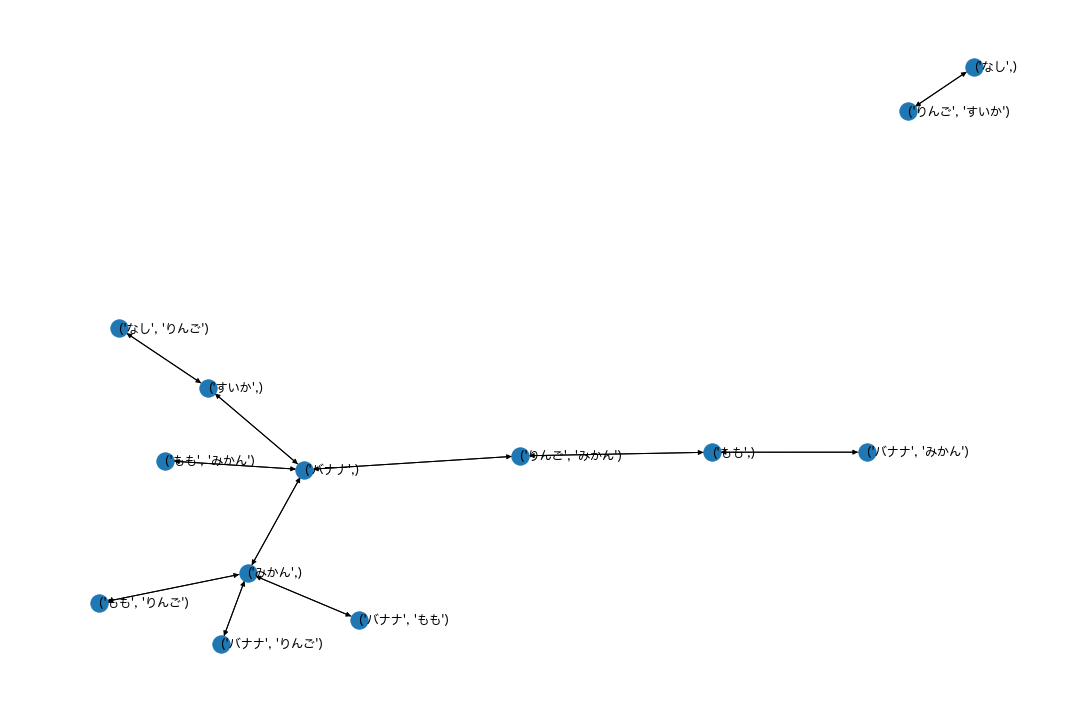

In [5]:
#グラフの描画
pos = nx.spring_layout(G,seed=1)

plt.figure(figsize=(15, 10))
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos,
    horizontalalignment='left', 
    verticalalignment='center',font_family='Hiragino Maru Gothic Pro')
plt.axis('off')
plt.tight_layout()
plt.show()